# Hi everyone. This is the what I have worked on. As you see, the analysis is broken down into these 4 themes:

### 1. Basic exploratory analysis (boolean indexing, groupby's, correlations, etc.).
### 2. Data analysis using datatime column.
### 3. Using geogrphical coordinates (latitude, longitude) for analysis and visualization
### 4. Analysis using data related to gender and age.
### 5. Joining other datasets (twitter api, yelp api, etc.) to form more powerful insights.  

In [72]:
import pandas as pd 
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [73]:
df = pd.read_csv('/Users/Haebichan/Desktop/crime data.csv')

In [74]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [75]:
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

#### Notice the Location column, which has a spacing. Use the code below to strip all unnecessary spaces.

In [76]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location'],
      dtype='object')

In [77]:
df.shape

(1755318, 26)

#### Over 1.5 million samples, wow! Working with large data like this can break your jupyter notebook, especially if you are using for loops to say replace categorical values in a column with numeric ones. Maybe there's a better way to do things like this that doesn't encourage breaking.








# Basic Exploratory Data Analysis

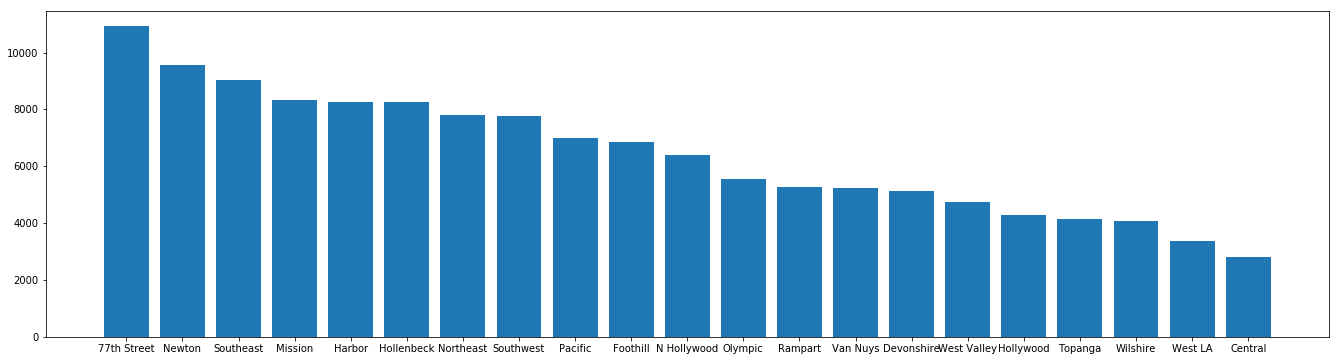

In [78]:
#The graph above shows the number of reported times vehicles get stolen in different parts of Los Angeles.
stolen_vehicle_area_counts = df[df['Crime Code Description'] == 'VEHICLE - STOLEN']['Area Name'].value_counts()

figure(figsize=(23,6))
stolen_vehicle_area_counts.sort_values()
bar(range(21), stolen_vehicle_area_counts)
xticks(range(21), stolen_vehicle_area_counts.index);

Text(0.5,1,'Homicide counts by LA area')

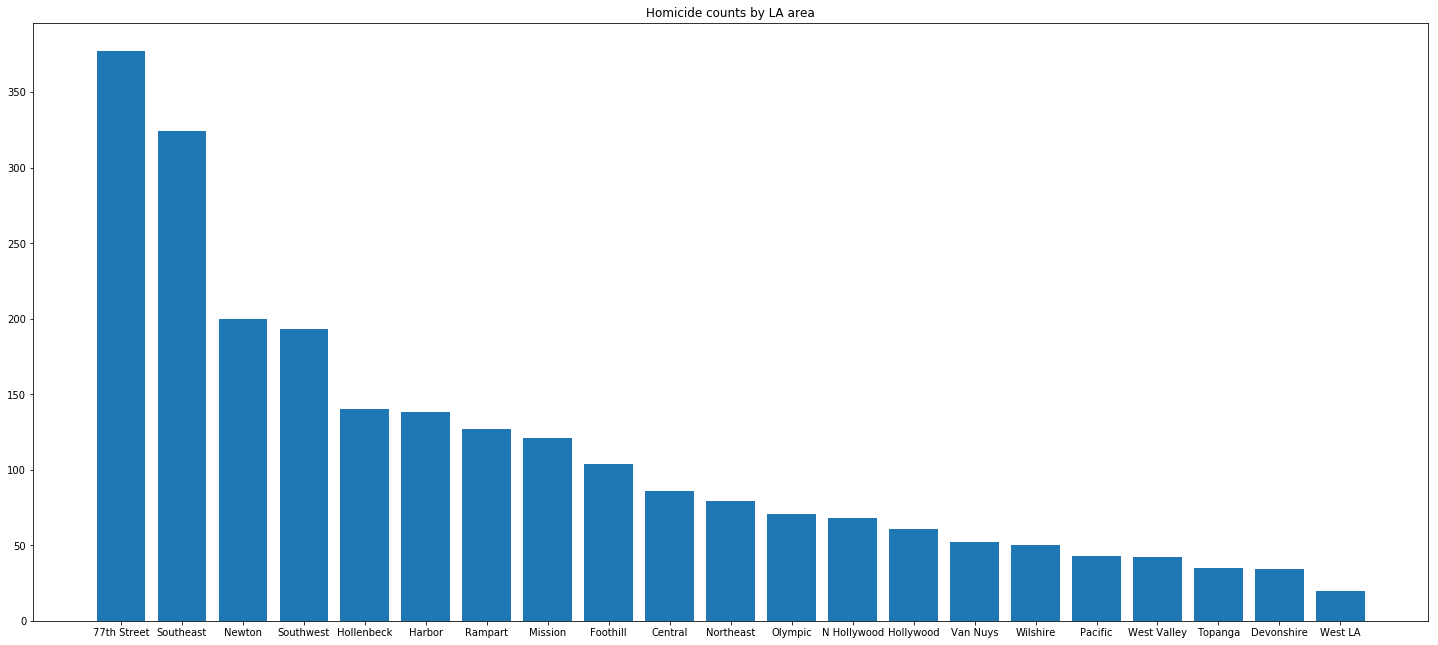

In [79]:
#The graph below shows the same, but with criminal homicide. Wow! Everyone stay away from 77th street.

homicide_counts_by_area = df[df['Crime Code'] == 110]['Area Name'].value_counts()


figure(figsize=(25,11))
bar(range(21), homicide_counts_by_area)
xticks(range(21), homicide_counts_by_area.index);
title('Homicide counts by LA area')

# Exploring and Analyzing Data Through DateTime

In [80]:
df = df[df['Time Occurred'] >= 1000]

#### The reason why I am ignoring crimes that have occurred in between 12:00 am to 10:00 am (" >= 1000 ") is that I just don't know how to properly transform values lower than 1000 in the "Time Occurred" column into a 'datetime' type. As it stands, the values in that column look like this: 900, 110000, etc., which means 12:09 am, 11:00 am, etc. 

.

In [81]:
df['Time Occurred'] = df['Time Occurred'].astype(str)

In [82]:
df['Time Occurred'] = [i[:-2] + ':' + i[-2:] + ':00' for i in df['Time Occurred']]

#### What I did here was to first turn the integers in the 'Time Occurred" column into string. In doing so, I could add ":00" into each values. This is important, since if you want to change the type of column into a 'datetime', you need the values to be in "12:00:00" kind of format, from what I understand. If that's not true, please tell me the correct answer. This is why I couldn't use the time between 12:00 am to 9:00 am because they look like ' :1:00 ', which cannot be understood by pandas.






.

In [83]:
#Merging the Date and the Time columns and turning them into one column with a 'datetime' format.

df['Date Occurred'] = pd.to_datetime(df['Date Occurred'] + " " + df['Time Occurred'], format="%m/%d/%Y %H:%M:%S")

In [84]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,2013-03-11 18:00:00,18:00:00,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,2010-01-22 23:00:00,23:00:00,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,2013-03-18 20:30:00,20:30:00,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,2010-11-10 18:00:00,18:00:00,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,2014-01-04 23:00:00,23:00:00,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [85]:
#Now drop all the columns that don't seem quite useful for data exploration and analysis

df.drop(['DR Number','Date Reported','Time Occurred', 'Crime Code 1','Crime Code 2','Crime Code 3','Crime Code 4'], 1 , inplace = True)

In [86]:
df.head()

,Date Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Address,Cross Street,Location
0,2013-03-11 18:00:00,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,30.0,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,2010-01-22 23:00:00,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,NaN,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,VAN NESS,15TH,"(34.0454, -118.3157)"
2,2013-03-18 20:30:00,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,12.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,2010-11-10 18:00:00,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,NaN,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,88TH,WALL,"(33.9572, -118.2717)"
4,2014-01-04 23:00:00,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,84.0,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"









### Now that we have the date column with hours, days, month, years, etc. we can do really fun analysis. But before we can do that, we need to extract hours, days, etc. from the datetime column and make them into individual columns. We can do this by using the .hour function stored in a datetime variable.

In [87]:
df['hour occurred'] = df['Date Occurred'].apply(lambda x: x.hour)

In [88]:
#### We can also extract columns this way, using a function instead of a lambda expression. ###



# dt = df['Date Occurred'][205833] 

# def get_hour(dt):
#     return dt.hour

# df['hour occurred'] = df['Date Occurred'].map(get_hour)


In [89]:
# We can also extract many other things, like the month, weekdays, days of the week, days of the month.

df['month occurred'] = df['Date Occurred'].apply(lambda x: x.month)
df['weekday occurred'] = df['Date Occurred'].apply(lambda x: x.weekday())
df['dom occurred'] = df['Date Occurred'].apply(lambda x: x.day)
df['day occurred'] = df['Date Occurred'].apply(lambda x: x.weekday_name)

Text(0.5,1,'monthly counts of theft')

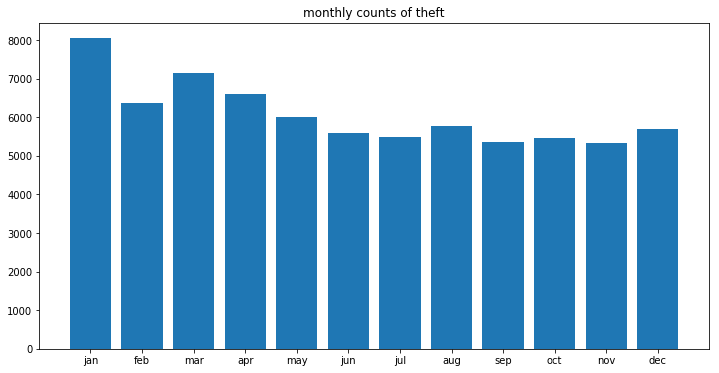

In [90]:
#And let's plot some of them! For instance, are there any monthly trends we notice in crimes related to homicide?

theft_monthly_count = df[df['Crime Code'] == 354]['month occurred'].value_counts().sort_index()


figure(figsize=(12,6))
bar(range(1,13), theft_monthly_count)
xticks(range(1,13), 'jan feb mar apr may jun jul aug sep oct nov dec'.split());
title('monthly counts of theft')

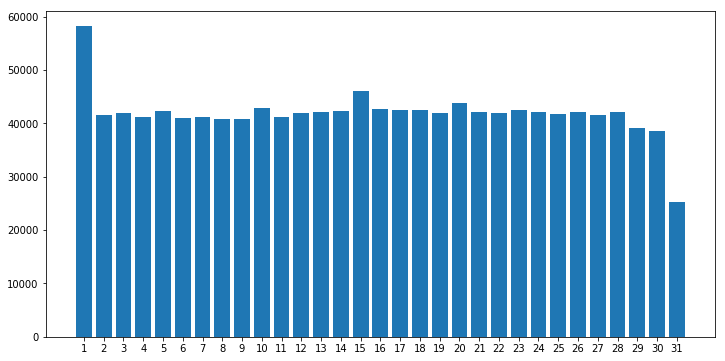

In [91]:
# Perhaps days of the month in the last eight years?

def count_rows(rows):
    return len(rows)

by_date = df.groupby('dom occurred').apply(count_rows)

figure(figsize = (12,6))
bar(range(1,32), by_date)
xticks(range(1,32), by_date.index);




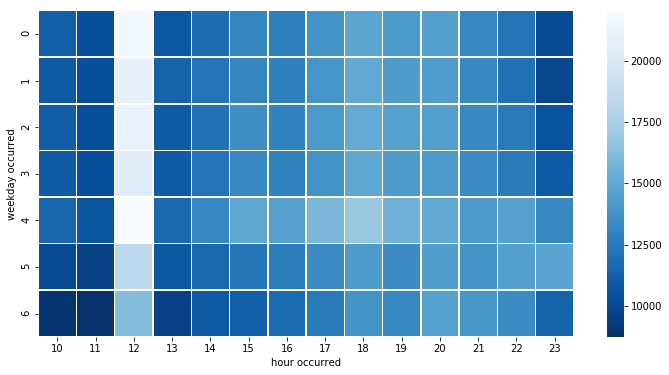

In [92]:
# Seaborn is like matplotlib jacked up on amino acids. It's more advanced in many ways. For instsance, the heatmap function (which exists in matplotlib but isn't as cool-looking) allows us to visualize data points in a matrix where its intensity is represented by colors. Can you spot any interesting pattens below?

import seaborn as sns

m = df.groupby(['weekday occurred','hour occurred']).apply(count_rows).unstack()
figure(figsize=(12,6))
sns.heatmap(m, cmap='Blues_r', linewidth=0.5);

# Data Analysis Using Geographical Coordinates

In [93]:
# The code below seems long, but if you breat it down, all it's saying is to take the latitude and longitude coordinates, which are stored in one column, to divide them into two seprate columns. 

coordinates = df['Location'].str.strip('()').str.split(', ', expand = True).rename(columns = {0: 'Latitude', 1: 'Longitude'})

df = df.join(coordinates)

In [94]:
df.head()

,Date Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,...,Address,Cross Street,Location,hour occurred,month occurred,weekday occurred,dom occurred,day occurred,Latitude,Longitude
0,2013-03-11 18:00:00,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,30.0,F,W,...,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)",18,3,0,11,Monday,33.9829,-118.3338
1,2010-01-22 23:00:00,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,NaN,NaN,NaN,...,VAN NESS,15TH,"(34.0454, -118.3157)",23,1,4,22,Friday,34.0454,-118.3157
2,2013-03-18 20:30:00,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,12.0,NaN,NaN,...,200 E 104TH ST,NaN,"(33.942, -118.2717)",20,3,0,18,Monday,33.942,-118.2717
3,2010-11-10 18:00:00,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,NaN,NaN,NaN,...,88TH,WALL,"(33.9572, -118.2717)",18,11,2,10,Wednesday,33.9572,-118.2717
4,2014-01-04 23:00:00,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,84.0,M,W,...,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",23,1,5,4,Saturday,34.2009,-118.6369


/Users/Haebichan/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Haebichan/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


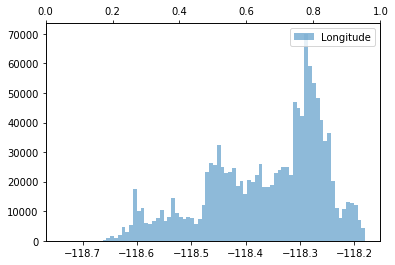

In [95]:
# With these coordinates, we can do some really cool things. For instance, we can plot them as histograms to see where crimes occur the most. With "twiny()" function, we can have two graphs in one place. Much like the the " as = fig.add_subplot() "

df['Latitude'] = df['Latitude'].astype(float) 
df['Longitude'] = df['Longitude'].astype(float) 
df['Longitude'].describe()
df['Latitude'].describe()

hist(df.Longitude, bins = 80, range = (-118.74, -118.180), label = 'Longitude', alpha = 0.5);
legend(loc= 'upper right')
twiny()
legend(loc='upper left')

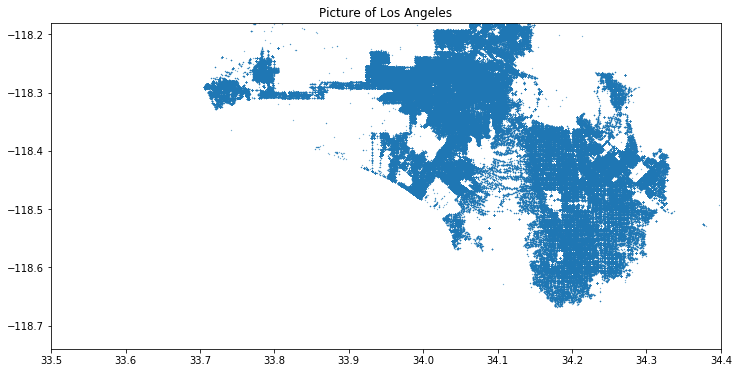

In [96]:
# Or, we can do something even much, much cooler. With these points, we can draw Los Angeles!

figure(figsize = (12,6))
plot(df.Latitude, df.Longitude, '.', ms=0.5);
xlim(33.5, 34.4);
ylim(-118.74, -118.180);
title('Picture of Los Angeles');

# Other Kinds of Analysis: Gender and Age

With the "Victim Sex" and "Victim Age" columns, we can really interesting things, like the gender ratio, which gender or age gets correlated with which crime, etc. I won't do that here, as I haven't done it myself. Please try it yourselves! 

# Other Other kinds of Analysis: API's

We can also link this dataset with other datasets to see if there are other insights we can extract. We can use the twitter api to see if particular tweets correspond to the intensity in crimes, or maybe the Yelp API to see the relationship between business and crimes.